# Fowl Escapades

This notebook shows a quick example submission to the 'Fowl Escapades' challenge on Zindi. 

It's not necessarily a good submission, but it does take you through the whole process. Loading the data, processing the audio into features (spectrograms, in this case) and making a submission.

I hope it's useful :)

# Load the labels

I'm assuming you've extracted test.zip and train.zip, and downloaded the CSV files from Zindi.

Here we'll generate a couple of dataframes with the labels for train and paths to the images.

In [1]:
import pandas as pd

In [2]:
sub = pd.read_csv('../input/SampleSubmission.csv')
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = pd.read_csv('../input/Train.csv')
train.head()

,ID,common_name
0,MBMG2C,Ring-necked Dove
1,K8LJSB,Ring-necked Dove
2,OGD9L6,Ring-necked Dove
3,581PCQ,Ring-necked Dove
4,P91M1F,Ring-necked Dove


In [4]:
# This list will be useful later
birds = sub.columns[1:]
birds

Index(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark', 'Eastern Clapper Lark',
       'Rufous-naped Lark', 'Dark-capped Bulbul', 'Sombre Greenbul',
       'Long-billed Crombec', 'African Reed Warbler', 'Rattling Cisticola',
       'Levaillants Cisticola', 'Tawny-flanked Prinia', 'Karoo Prinia',
       'Bar-throated Apalis', 'Green-backed Camaroptera',
       'Chestnut-vented Warbler', 'Cape White-eye', 'Karoo Scrub Robin',
       'White-browed Scrub Robin', 'Cape Robin-Chat',
       'White-browed Robin-Chat', 'Chorister Robin-Chat',
       'Southern Double-collared Sunbird', 'White-bellied Sunbird',
       'African Pipit', 'African Rock Pipit', 'Cape Bunting'],
      d

In [5]:
# Add file names
# train['file_name'] = 'train/'+train['ID']+'.mp3'
# sub['file_name'] = 'test/'+sub['ID']+'.mp3'

train['file_name'] = '../train/'+train['ID']+'.png'
sub['file_name'] = '../test/'+sub['ID']+'.png'

# Generate features

There are many ways to tackle this challenge. Try deep learning on the audio, generate a spectrogram and treat this as an image classification task, use some signal processing tricks to look for close matches, try to extract meaningful features such as dominant frequencies.... It's up to you :)

This blog (https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d) shows how to visualize different properties of the waveform, and some features you could use. 

For this example, I'll generate a square spectrogram and save as an image file - not a very elegant approach but let's see where it gets us.

In [6]:
import IPython.display as ipd
from matplotlib import pyplot as plt
import librosa


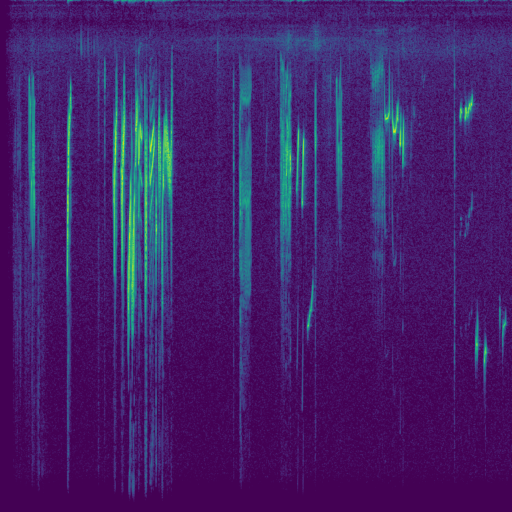

In [7]:
#listen to a sound
pth = train['file_name'].sample(1).values[0]
ipd.Audio(pth)

In [8]:
# Going from a sound to an image: spectrograms

def gen_spectrogram(path):
  x , sr = librosa.load(path)
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X)[:,:min(1025, len(X[0]))])
  fig = plt.figure(frameon=False)
  fig.set_size_inches(8, 8)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  ax.imshow(Xdb, aspect='auto')
  fig.savefig(path[:-4]+'.png', dpi=512//8)
  print(path[:-4]+'.png')

# gen_spectrogram(pth)

In [ ]:
# This takes a long time to run, and you might have to do it in batches. Save the spectrogras for future runs!
import numpy as np
import os
for i, pth in enumerate(np.concatenate([train['file_name'].values, sub['file_name'].values])):
  print(i*100//(len(sub)+len(train)), '% done')
  # Check if we've already generated a spectrogram, and if not, make one
  if not os.path.isfile(pth[:-4]+'.png'):
    plt.clf()
    gen_spectrogram(pth)
  ipd.clear_output(wait=True)
  plt.close()

In [9]:
# Checking that the spectrograms were generated successfully:
import glob
ims = glob.glob('../train/*.png')
print(len(ims), len(train))

1857 1857


In [10]:
train.head()

,ID,common_name,file_name
0,MBMG2C,Ring-necked Dove,../train/MBMG2C.png
1,K8LJSB,Ring-necked Dove,../train/K8LJSB.png
2,OGD9L6,Ring-necked Dove,../train/OGD9L6.png
3,581PCQ,Ring-necked Dove,../train/581PCQ.png
4,P91M1F,Ring-necked Dove,../train/P91M1F.png


In [11]:
# If you stopped the process early and want to try with only a few spectrograms, this will only use the ones that have been generated
train['img_path'] = '../train\\' + train['ID']+'.png'
# train['img_path'] = train['file_name'].str[:-4]+'.png'
train = train.loc[train.img_path.isin(ims)]
len(train)

1857

In [12]:
# Similarly, test now has rows for files that have had spectrograms created.
sub['img_path'] = '../test\\'+sub['ID']+'.png'
ims = glob.glob('../test/*.png')
test = sub.loc[sub.img_path.isin(ims)]
print(len(sub), len(test))

911 911
